# <img style="float: left; padding-right: 10px; width: 45px" src="styles/iacs.png"> S-109A Introduction to Data Science 

## Homework 1

**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---


## Main Theme: Data Collection - Web Scraping - Data Parsing 
#### Learning Objectives 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you read the data from a file, then you scrape them directly from a website. You look for specific pieces of information by parsing the data, you clean the data to prepare them for analysis, and finally, you answer some questions.

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables in Canvas are: a) This python notebook with your code and answers, b) a .pdf version of this notebook, c) The BibTex file you created.
d) The JSON file you created.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.

In [1]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


## Part A [50 pts]:  Help a professor convert his publications to bibTex

### Overview

In Part 1 your goal is to parse the HTML page of a Professor containing some of his publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 44 publications in descending order from No. 244 to No. 200.

You are to use python's **regular expressions**, a powerful way of parsing text. You may **not** use any parsing tool such as Beautiful Soup yet. In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation(JSON), a text-based open standard designed for transmitting structured data over the web.

### <p class='q1'> Question 1: Parsing using Regular Expressions 
 **1.1** Write a function called `get_pubs` that takes a .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **1.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **1.3** Find all unique journals and copy them in a variable named `journals`.  
 
 **1.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the &lt;I&gt; HTML tag.
- Each publication has multiple authors. 
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`. 
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry. 
- You want to remove duplicates from the list of journals. 

### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

#### 1.1

In [32]:
# import the regular expressions library
import re

In [33]:
# use this file 
pub_filename = 'data/publist_super_clean.html'

In [34]:
# your code here
prof_pubs = get_pubs(pub_filename)

In [35]:
# definition of get_pubs
def get_pubs(filename: str) -> str:
    
    '''Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    '''
    with open(filename, "r") as f:
        fileString = f.read()
        postString = fileString.split("<OL START=244>")[1];
        return postString

In [36]:
# check your code 
print (prof_pubs)


<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>


You should see an HTML page
```html
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>
</LI>
</OL>
    ```

#### 1.2

In [52]:
# your code here
regex_author = r"C.M.\sFriend"
authorMatch = re.findall(regex_author, prof_pubs)
authorCount = len(authorMatch)
print("C.M. Friend appears in the list of publications {0} times".format(authorCount))

C.M. Friend appears in the list of publications 5 times


#### 1.3

In [73]:
# your code here
journal_regex = r"<I>(.*)</I>"
journals = re.findall(journal_regex, prof_pubs)
journal_clean = [journal.strip() for journal in journals]
journals = set(journal_clean)

In [74]:
# check your code: print journals
journals

{'2010 ACM/IEEE International Conference for High Performance',
 'ACSNano.',
 'Ab initio',
 'Acta Mater.',
 'Catal. Sci. Technol.',
 'Chem. Eur. J.',
 'Comp. Phys. Comm.',
 'Concurrency Computat.: Pract. Exper.',
 'Energy & Environmental Sci.',
 'Int. J. Cardiovasc. Imaging',
 'J. Chem. Phys.',
 'J. Chem. Theory Comput.',
 'J. Phys. Chem. B',
 'J. Phys. Chem. C',
 'J. Phys. Chem. Lett.',
 'J. Stat. Mech: Th. and Exper.',
 'Langmuir',
 'Molec. Phys.',
 'Nano Lett.',
 'NanoLett.',
 'New J. Phys.',
 'New Journal of Physics',
 'PHYSICAL REVIEW B',
 'Phil. Trans. R. Soc. A',
 'Phys. Rev. B',
 'Phys. Rev. E - Rap. Comm.',
 'Phys. Rev. Lett.',
 'Sci. Model. Simul.',
 'Sol. St. Comm.',
 'Top. Catal.'}

Your output should look like this (remember, no duplicates):
```
'ACSNano.',
 'Ab initio',
 'Ab-initio',
 'Acta Mater.',
 'Acta Materialia',
 'Appl. Phys. Lett.',
 'Applied Surface Science',
 'Biophysical J.',
 'Biosensing Using Nanomaterials',

 ...

 'Solid State Physics',
 'Superlattices and Microstructures',
 'Surf. Sci.',
 'Surf. Sci. Lett.',
 'Surface  Science',
 'Surface Review and Letters',
 'Surface Sci. Lett.',
 'Surface Science Lett.',
 'Thin Solid Films',
 'Top. Catal.',
 'Z'}
```

#### 1.4

In [117]:
# our code here
regex_author = r"<BR>(.*) \n"
pub_authors = re.findall(regex_author, prof_pubs)

In [118]:
# check your code: print the list of strings containing the author(s)' names
for item in pub_authors:
    print (item)

Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,
 A. Peters, S. Melchionna, E. Kaxiras, J. Latt, J. Sircar, S. Succi,
 J. Ren, E. Kaxiras and S. Meng,
 T.A. Baker, E. Kaxiras and C.M. Friend,
 C.L. Chang, S.K.R.S. Sankaranarayanan, D. Ruzmetov, M.H. Engelhard, E. Kaxiras and S. Ramanathan,
 T.A. Baker, C.M. Friend and E. Kaxiras,
 S. Melchionna, M. Bernaschi, S. Succi, E. Kaxiras, F.J. Rybicki, D. Mitsouras, A.U. Coskun and C.L. Feldman,
 M. Bernaschi, M. Fatica, S. Melchionna, S. Succi and E. Kaxiras,
 E. Manousakis, J. Ren, S. Meng and E. Kaxiras,
 A. Gali, E. Janzen, P. Deak, G. Kresse and E. Kaxiras,
 S.K.R.S. Sankaranarayanan, E. Kaxiras and S. Ramanathan,
 M. Bernaschi, S. Melchionna, S. Succi, M. Fyta, E. Kaxiras
 T.A. Baker, B.J. Xu, X.Y. Liu, E. Kaxiras and C.M. Friend,
 F.J. Rybicki, S. Melchionna, D. Mitsouras, A.U. Coskun, A.G. Whitmore, E. Kaxiras, S. Succi, P.H. Stone and C.L. Feldman, 
 E.M. Kotsalis, J.H. Walther, E. Kaxiras and P. Koumoutsakos, 

Your output should look like this (a line for each paper's author(s) string, with or without the comma)<BR><br>
S. Meng and E. Kaxiras,<br>
G. Lu and E. Kaxiras,<br>
E. Kaxiras and S. Yip,<br>
...<BR>
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,<BR>
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,<BR>
E Kaxiras, and M D Lukin,<BR>

<hr style="height:1px">

### Question 2: Parsing and Converting to bibTex using Beautiful Soup

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which has the following format:
```
@article { _number_
     author = John Doyle
     title = Interaction between atoms
     URL = Papers/PhysRevB_81_085406_2010.pdf
     journal = Phys. Rev. B
     volume = 81
}
```

```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
```
About the [bibTex format](http://www.bibtex.org).

In Question 2 you are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex format. We used regular expressions for parsing HTML in the previous question but just regular expressions are hard to use in parsing real-life websites. A useful tool is [BeautifulSoup]  (http://www.crummy.com/software/BeautifulSoup/) (BS). You will parse the same file, this time using BS, which makes parsing HTML a lot easier.

**2.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.
    
**2.2** Write a function that reads in the BS object, parses it, converts it into the .bibTex format using python string manipulation and regular expressions, and writes the data into `publist.bib`. You will need to create that file in your folder.  

    
#### HINT
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper. You had already done this in Part 1 when you figured out how to get the name of the journal from the HTML code. The `find_all` method of BeautifulSoup might be useful.
- Question 2.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper.
- Make sure you catch exceptions when needed.
- Regular expressions are a great tool for string manipulation. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>

In [166]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

#### 2.1

In [220]:
# your code here
file_name = "data/publist_super_clean.html"
soup = make_soup(file_name)

# definition of make_soup
def make_soup(filename: str) -> BeautifulSoup:      
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page.
    '''
    with open(filename, "r") as f:
        filestring = f.read()
        soup = BeautifulSoup(filestring, "lxml")
        return soup

In [236]:
# check your code: print the Beautiful Soup object, you should see an HTML page
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
 <head>
  <title>
   Kaxiras E journal publications
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
  <meta content="" name="description"/>
  <meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
 </head>
 <body>
  <ol start="244">
   <li>
    <a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
     "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
    </a>
    <br/>
    Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
    <i>
     PHYSICAL REVIEW B
    </i>
    <b>
     84
    </b>
    ,  125411 (2011)
    <br/>
   </li>
  </ol>
  <ol start="243">
   <li>
    <a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
     "Eff

bs4.BeautifulSoup

Your output should look like this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

#### 2.2

In [393]:
# your code here 

def convert_to_bib(publist_html: BeautifulSoup) -> BeautifulSoup:
    
    with open("publist.bib", "w") as dataf:
        for pub_html in publist_html:        
            author = get_author(pub_html)
            title = get_title(pub_html)
            url = get_url(pub_html)
            journal = get_journal(pub_html)
            volume = get_volume(pub_html)
    
            dataf.write("@article\n{")
            dataf.write("\t author = "+author+"\n")
            dataf.write("\t title = "+title+"\n")
            dataf.write("\t url = "+url+"\n")
            dataf.write("\t journal = "+journal+"\n")
            dataf.write("\t volume = "+volume+"\n")
            dataf.write("}\n")

def get_author(pub_html: BeautifulSoup) -> str:
    author_regex = r"<br/>(.*)\n"
    try: 
        author = re.findall(author_regex, str(pub_html))[0].strip(',')
    except Exception:
        print("WARNING:")
        print("There was a problem retrieving the value so N/A has been assigned")
        print("Problem HTML: \n {0}".format(pub_html))
        volume = "N/A"
        author = "N/A"
    return author

def get_title(pub_html: BeautifulSoup) -> str:
    try:
        title = str(pub_html.find("a").string)
        title = title[1:]
    except Exception:
        print("WARNING:")
        print("There was a problem retrieving the value so N/A has been assigned")
        print("Problem HTML: \n {0}".format(pub_html))
        volume = "N/A"
        title = "N/A"
    return title

def get_url(pub_html: BeautifulSoup) -> str :
    url_regex = r"<a href=\"(.*).pdf"
    try:
        link = pub_html.findAll('a')
        url = re.findall(url_regex, str(link))[0]+'.pdf'
    except Exception:
        print("WARNING:")
        print("There was a problem retrieving the value so N/A has been assigned")
        print("Problem HTML: \n {0}".format(pub_html))
        volume = "N/A"
        url = "N/A"
    return url

def get_journal(pub_html: BeautifulSoup) -> str:
    try:
        journal = str(pub_html.find("i").string)
    except Exception:
        print("WARNING:")
        print("There was a problem retrieving the value so N/A has been assigned")
        print("Problem HTML: \n {0}".format(pub_html))
        journal = "N/A"
    return journal

def get_volume(pub_html: BeautifulSoup) -> str:
    try:
        volume = str(pub_html.find("b").string)
    except Exception:
        print("WARNING:")
        print("There was a problem retrieving the value so N/A has been assigned")
        print("Problem HTML: \n {0}".format(pub_html))
        volume = "N/A"
    return volume


html = list(soup.children)[1]
publist_html = soup.findAll('li')

convert_to_bib(publist_html)


There was a problem retrieving the value so N/A has been assigned
Problem HTML: 
 <li>
<a href="Papers/IEEE-SC10_2010.pdf" target="paper226">
"Multiscale simulation of cardiovascular flows on the IBM Bluegene/P: 
full heart-circulation system at near red-blood cell resolution"</a>
<br/> A. Peters, S. Melchionna, E. Kaxiras, J. Latt, J. Sircar, S. Succi, 
<i>2010 ACM/IEEE International Conference for High Performance </i>,
 doi: 10.1109/SC.2010.33 (2010).
<br/>
</li>


In [394]:
# check your code: print the BibTex file
f = open('publist.bib','r')
print (f.read())

@article
{	 author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
	 title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
	 url = Papers/2011/PhysRevB_84_125411_2011.pdf
	 journal = PHYSICAL REVIEW B 
	 volume = 84
}
@article
{	 author = JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng
	 title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"
	 url = Papers/2011/PhysRevB_84_035325_2011.pdf
	 journal = PHYSICAL REVIEW B 
	 volume = 84
}
@article
{	 author = Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras
	 title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses"
	 url = Papers/2011/PhysRevB_83_054204_2011.pdf
	 journal = PHYSICAL REVIEW B 
	 volume = 83
}
@article
{	 author = Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali
	 title = "Direct correlation of crysta

Your output should look like this
```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

...

@article
{    author = E. Kaxiras and S. Succi
     title = "Multiscale simulations of complex systems: computation meets reality"
     URL = Papers/SciModSim_15_59_2008.pdf
     journal = Sci. Model. Simul.
     volume = 15
}
@article
{    author = E. Manousakis, J. Ren, S. Meng and E. Kaxiras
     title = "Effective Hamiltonian for FeAs-based superconductors"
     URL = Papers/PhysRevB_78_205112_2008.pdf
     journal = Phys. Rev. B
     volume = 78
}
```

---

## Part B [50 pts]:  Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview

In Part 3 your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is **not** given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

### Question 1: Web Scraping Using Beautiful Soup
**1.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**1.2** Create a Beautiful Soup object named `star_soup` giving `my_page` as input.

**1.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages. 

**1.4** Write a function called `create_star_table` to extract information about each star (see function definition for the exact information to extract). **Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

**1.5** Now that you have scraped all the info you need, it's a good practice to save the last data structure you created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. Save this information to a JSON file and **submit** this JSON file in Canvas with your notebook. 

**1.6** Import the contents of the teaching staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`).

**1.7** You are now ready to answer the following intriguing questions: 
- How many performers made their first movie at 17?
- How many performers started as child actors? Define child actor as a person less than 12 years old. 
- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

**1.8** Make a plot of the number of credits versus the name of actor/actress. 
 


### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply some operation to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these before performing calculations on the data! 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

In [634]:
import requests

#### 1.1

In [643]:
# your code here
my_page = requests.get("https://www.imdb.com/list/ls025814950/")

<HR>
    <p>my_page.text is the content of the response in unicode.</p>
    <p>my_page.content is the content of the response in bytes.</p>
    <p>my_page.status_code is the response's current status code.</p>
<HR>

#### 1.2

In [644]:
# your code here
star_soup = BeautifulSoup(my_page.text, 'html.parser')

In [645]:
# check your code - you should see an HTML page
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

#### 1.3

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: the string containing the soup of the text in their individual info page (from url)

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [679]:
# your code here
def parse_stars(star_soup: BeautifulSoup) -> list:   
    stars_div = star_soup.findAll("div",{"class":"lister-item-content"})
    for star_div in stars_div:
        star = {}
        star_header_div = star_div.find("h3",{"class":"lister-item-header"})
        name_html = list(star_header_div.children)[3]
        if name_html:
            name = str(name_html.text).strip()
            star['name'] = name
            actor_div = star_div.find("p",{"class":"text-muted text-small"}).text
            if "Actress" in str(actor_div):
                gender = 1
            else:
                gender = 0
            star['gender'] = gender 
            url = "https://www.imdb.com"+star_header_div.find('a', href=True)['href']
            star['url'] = url
            page_html = requests.get(url)
            page_soup = BeautifulSoup(page_html.text, 'html.parser')
            star['page'] = page_soup
            starlist.append(star)
    return starlist

starlist = []
starlist = parse_stars(star_soup)

In [680]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]

{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
  

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

#### 1.4

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [686]:
# your code here
def create_star_table(starlist: list) -> list:
    star_table = []
    for star in starlist:

        star_soup = star.get('page')

        born_regex = r"nm_ov_bth_year\">(.*)</a>"    
        try:
            year_born = re.findall(born_regex, str(star_soup))[0]
            star['year_born'] = year_born
        except Exception:
            star['year_born'] = "N/A"

        filmo_div = star_soup.find("div",{"class":"filmo-category-section"})
        filmo_list = list(filmo_div.children)[1::2]

        credits = len(filmo_list)
        filmo_debut = filmo_list[credits-1]
        first_movie = filmo_debut.find("a").text.strip()
        star['first_movie'] = first_movie
        year_first_movie = filmo_debut.find("span").text.strip()
        star['year_first_movie'] = year_first_movie
        star['credits'] = credits

        star.pop('url','None')
        star.pop('page','None')
        star_table.append(star)
    return star_table

In [687]:
# RUN THIS CELL ONLY ONCE - IT WILL TAKE SOME TIME TO RUN
star_table = []
star_table = create_star_table(starlist)

In [688]:
# check your code
star_table

[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': 25},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': 55},
 {'name': 'Emilia Clarke',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': 17},
 {'name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2002-2003',
  'credits': 51},
 {'name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': 30},
 {'name': 'Pom Klementieff',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Après lui',
  'year_first_movie': '2007',
  'credits': 27},
 {'name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_first_movie': '2006',
  'c

Your output should look like this:
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

#### 1.5

In [689]:
# your code here
import json

with open('student_starinfo.json', 'w') as output:  
    json.dump(star_table, output)

#### 1.6

In [911]:
# your code here
with open('data/staff_starinfo.json', 'r') as f:
    star_info = json.load(f)

star_info_json_str = json.dumps(star_info)
df = pd.read_json(star_info_json_str)
df.head()

'''
year_first_movie needs to be cleaned up to show one year
This probably occurs because it's a TV Show
E will choose first year assuming it started in the first year and 
'''
df['year_first_movie'] = df['year_first_movie'].apply(lambda x: x.split('-')[0]).apply(lambda y: y[:4])
df.head()

'''
Now let's check the data type
'''
df.dtypes

'''
year_first_movie should be an int64
'''
df['year_first_movie'] = pd.to_numeric(df['year_first_movie'])

'''
Add a new column to your dataframe with the age of each actor when they made first movie
'''
df['age_at_first_movie'] = df['year_first_movie'] - df['year_born']
df.head()

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
0,25,Bubot,1,Gal Gadot,1985,2007,22
1,55,Tommaso,0,Tom Hardy,1977,2001,24
2,17,Doctors,1,Emilia Clarke,1986,2009,23
3,51,All My Children,1,Alexandra Daddario,1986,2002,16
4,30,Järngänget,0,Bill Skarsgård,1990,2000,10


#### 1.7.1

In [923]:
# your code here
'''
How many performers made their first movie at 17?
How many performers started as child actors? Define child actor as a person less than 12 years old.
Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017?
'''
grouped = df.groupby('age_at_first_movie')
grouped_by_debut_age = grouped.name.nunique()

print("{0} performers made their first movie at 17".format(grouped_by_debut_age.at[17]))

child_actor_count = (grouped.apply(lambda g: g[g['age_at_first_movie'] <= 12]).count()['name'])
print("{0} performers started as child actors".format(child_actor_count))

8 performers made their first movie at 17
21 performers started as child actors


Your output should look like this:<BR>
8 performers made their first movie at 17

#### 1.7.2

In [927]:
# your code here
prolific = df.loc[df['credits'] == df['credits'].max(), 'name'].iloc[0]
print("{0} is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017 for his {1} credits".format(prolific,df['credits'].max()))

Sean Young is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017 for his 122 credits


#### 1.8

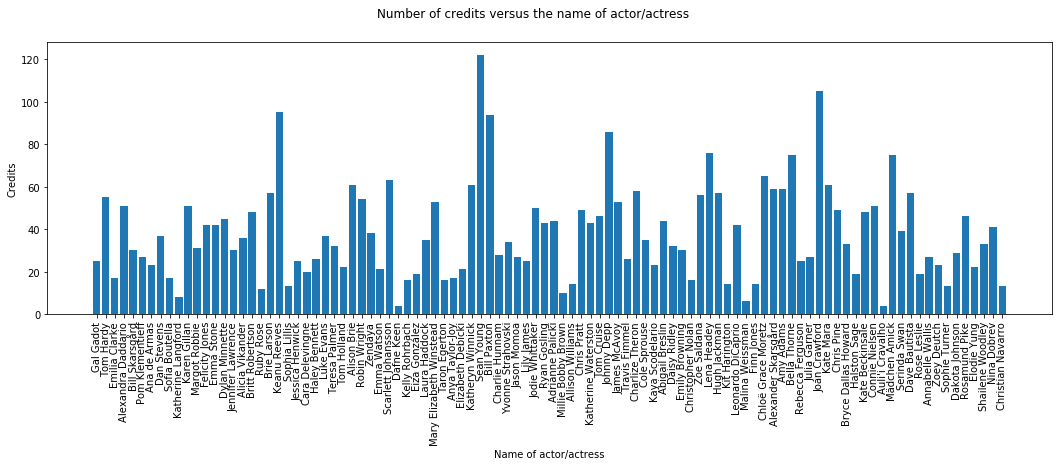

In [964]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(18, 5))
plt.bar(df['name'], df['credits'])
plt.xticks(rotation=90)
plt.xlabel('Name of actor/actress')
plt.ylabel('Credits')
plt.suptitle('Number of credits versus the name of actor/actress')
plt.show()

<HR>

Your answer here

<HR>

In [950]:
from IPython.core.display import HTML
def css_styling(): styles = open("styles/cs109.css", "r").read(); return HTML(styles)
css_styling()